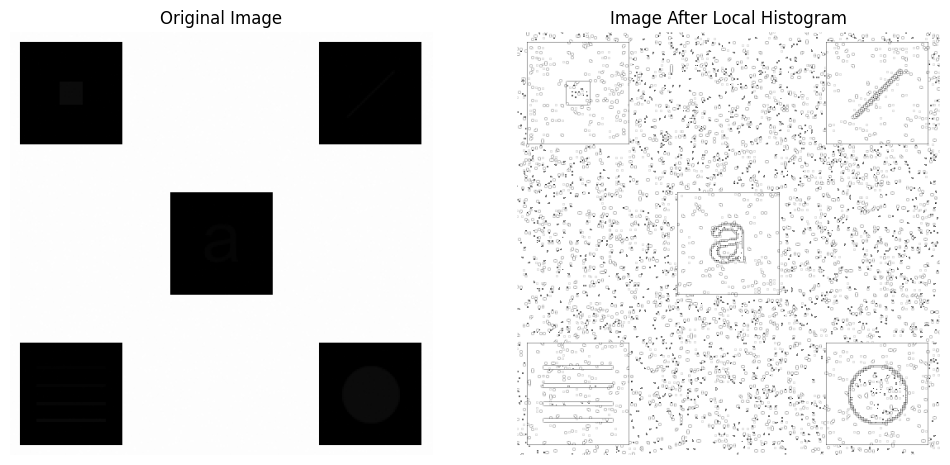

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# neighborhood size of 3X3
M = 3
N = 3
# the colors range [0,255]
COLORS_RANGE = 256
# calculating the middle index in neighborhood
MID_M = int((M - 1) / 2)
MID_N = int((N - 1) / 2)

def calc_idx_val(padded_img, row_num, col_num):
    # get the middle value in current neighborhood
    mid_val = padded_img[row_num, col_num]
    vals_count = 0
    # go over the M*N sized current neighborhood and count how many values are lower or equal to mid_val
    for i in range(row_num - MID_M, row_num + MID_M + 1):
        for j in range(col_num - MID_N, col_num + MID_N + 1):
            if mid_val >= padded_img[i, j]:
                vals_count = vals_count + 1

    # calculate and return the new index value
    return int(np.round((vals_count * (COLORS_RANGE - 1)) / (M * N)))

def local_histogram(img):
    # add padding of zeroes to input image
    padded_img = cv2.copyMakeBorder(img, MID_N, MID_N, MID_M, MID_M, cv2.BORDER_CONSTANT)
    rows_padded, cols_padded = padded_img.shape
    # set the output array with zeroes
    out_array = np.zeros(img.shape)

    # go over the padded array indexes, excluding the padding
    for rowP in range(1, rows_padded - 1):
        for colP in range(1, cols_padded - 1):
            # assign to the output array the new indexes values
            out_array[rowP - 1, colP - 1] = calc_idx_val(padded_img, rowP, colP)

    # return output array as image
    return np.array(out_array / np.max(out_array, axis=(0, 1)) * 255, dtype=np.uint8)

if __name__ == '__main__':
    # load the input image
    img = cv2.imread('embedded_squares.JPG', cv2.IMREAD_GRAYSCALE)

    # perform local histogram on input image
    outImg = local_histogram(img)

    # Create a subplot to show both original and processed images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(outImg, cmap='gray')
    plt.title('Image After Local Histogram')
    plt.axis('off')

    plt.show()
